In [31]:
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Part1_Case Study _8.csv')
df.head()

,Price,Beds,Baths,Square Feet
0,330.0,3,2.0,1771
1,400.0,3,2.0,1213
2,416.0,3,2.5,1884
3,420.0,3,2.0,1922
4,496.0,4,2.5,1858


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        45 non-null     float64
 1   Beds         45 non-null     int64  
 2   Baths        45 non-null     float64
 3   Square Feet  45 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.5 KB


# 1. Obtain the summary statistics for the variables and comment on them

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,45.0,391.191111,132.600555,160.0,300.0,378.0,496.0,690.00
Beds,45.0,3.288889,1.160373,1.0,3.0,3.0,4.0,6.00
Baths,45.0,2.333333,0.992872,1.0,2.0,2.0,2.5,4.75
Square Feet,45.0,1900.711111,683.044708,768.0,1440.0,1858.0,2160.0,3875.00


# 2. Comment on the distributions of data for the variables? Are they symmetrical? Skewed?

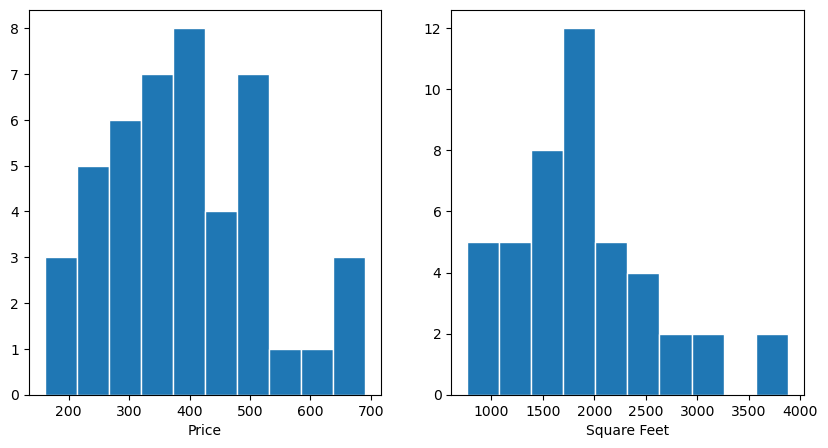

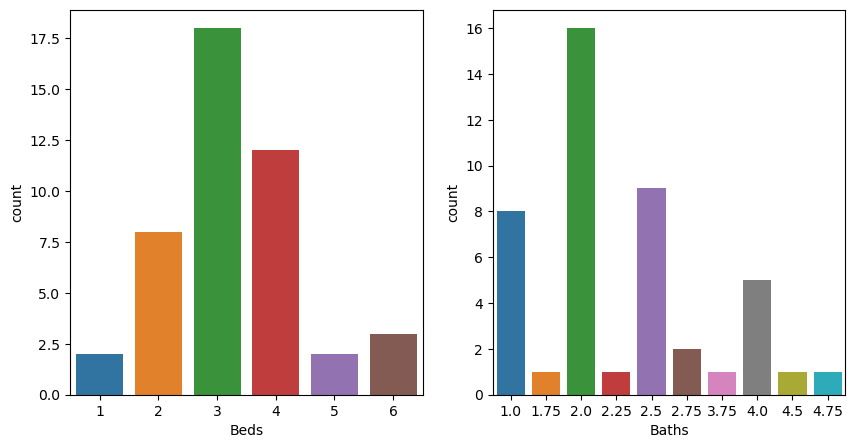

In [17]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
cols1 = ['Price', 'Square Feet']

for i,ax in enumerate(axs.flatten()):
    ax.hist(df[cols1[i]],edgecolor='w')
    ax.set_xlabel(cols1[i])
plt.show()

fig, axs = plt.subplots(1,2,figsize=(10,5))
cols2 = ['Beds', 'Baths']
for i,ax in enumerate(axs.flatten()):
    sns.countplot(x=df[cols2[i]],ax=ax)
    ax.set_xlabel(cols2[i])
plt.show()

# 3. Obtain the correlations between variables and comment on them?
* Price is strongly correlated with all of the independent variables.
* The independent variables are strongly correlated with each other.
* Since the independent variables are strongly correlated with each other, it might be difficult for the regression model to determine explanatory power of each variable.
* Thus, since Baths has the highest correlation with Price, there is a chance Baths might be the only statistically significant variable.

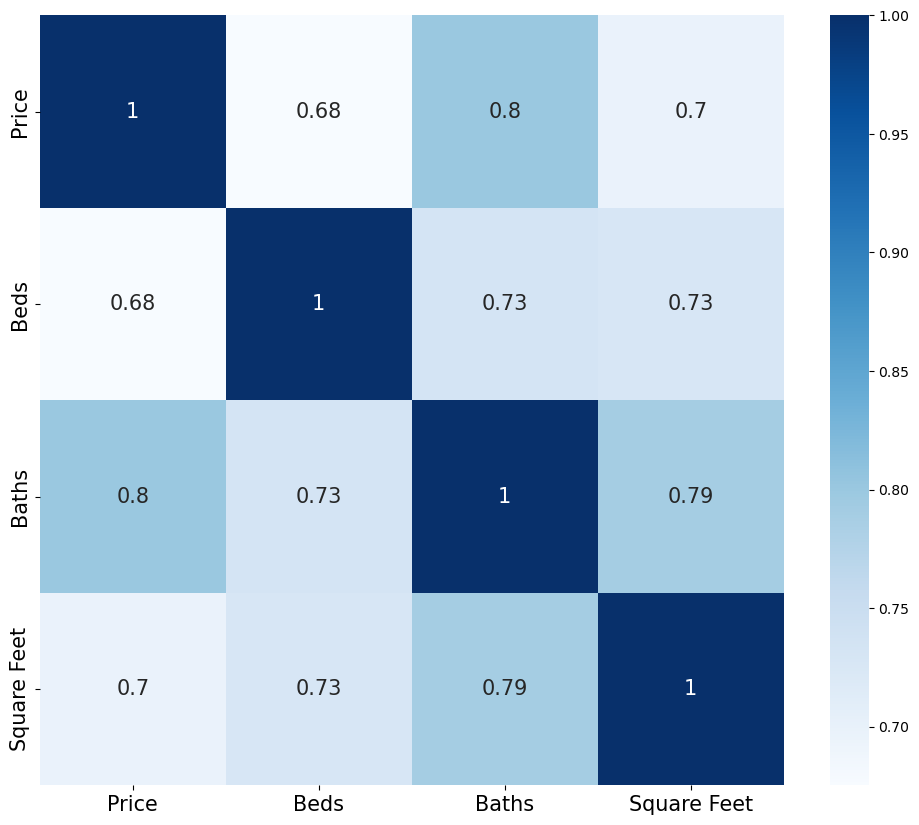

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues',annot_kws={'fontsize':15})
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# 4. Perform a multiple linear regression analysis with selling price as the response variable and number of square feet, number of bed rooms and number of bath rooms as predictor variables.

In [59]:
fm1 = 'Price ~ Beds + Baths + Q("Square Feet")'
model1 = smf.ols(formula=fm1,data=df).fit()

fm2 = 'Price ~ Baths + Q("Square Feet")'
model2 = smf.ols(formula=fm2,data=df).fit()

fm3 = 'Price ~ Baths'
model3 = smf.ols(formula=fm3,data=df).fit()

fm4 = 'np.log(Price) ~ Beds + Baths + np.log(Q("Square Feet"))'
model4 = smf.ols(formula=fm4,data=df).fit()

results = Stargazer([model1,model2,model3,model4])
results.custom_columns(['Model 1','Model 2','Model 3','Model 4'],[1,1,1,1])
results.show_model_numbers(False)
results.show_degrees_of_freedom(False)
results

In [53]:
# null = 'C(Baths)[T.1.75] = 0,C(Baths)[T.2.0] = 0,C(Baths)[T.2.25] = 0,C(Baths)[T.2.5] = 0,C(Baths)[T.2.75] = 0,C(Baths)[T.3.75] = 0,C(Baths)[T.4.0] = 0,C(Baths)[T.4.5] = 0,C(Baths)[T.4.75] = 0'
# model1.f_test(null)

In [51]:
null = 'Beds = 0, Q("Square Feet") = 0'
model1.f_test(null)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.2714908815713701, p=0.291237079797721, df_denom=41, df_num=2>

In [52]:
# null = 'C(Beds)[T.2] = 0, C(Beds)[T.3] = 0, C(Beds)[T.4] = 0, C(Beds)[T.5] = 0, C(Beds)[T.6] = 0'
# model1.f_test(null)

In [45]:
sm.stats.anova_lm(model1,typ=2)

,sum_sq,df,F,PR(>F)
Beds,7602.861857,1.0,1.189425,0.281814
Baths,89355.352140,1.0,13.979138,0.000565
"Q(""Square Feet"")",3105.508300,1.0,0.485839,0.489723
Residual,262074.063055,41.0,NaN,NaN


In [48]:
sm.stats.anova_lm(model2,model1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,42.0,269676.924912,0.0,NaN,NaN,NaN
1,41.0,262074.063055,1.0,7602.861857,1.189425,0.281814


In [49]:
sm.stats.anova_lm(model3,model1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,43.0,278328.930444,0.0,NaN,NaN,NaN
1,41.0,262074.063055,2.0,16254.867389,1.271491,0.291237


# 5. State the regression equation and interpret the regression coefficients.
* $ \hat{y} = 105.26 + 17.83(Beds) + 79.90(Baths) + 0.02(Square Feet) $

In [50]:
model1.params

Intercept           105.261086
Beds                 17.835406
Baths                79.900956
Q("Square Feet")      0.021484
dtype: float64

# 6. Comment on the goodness of fit of the regression equation for the data
* Model 1 has an $R^2$ of 0.661 which suggest that the model captures 66.1% of the variation observed in Price.

In [55]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     26.68
Date:                Sat, 13 May 2023   Prob (F-statistic):           9.86e-10
Time:                        11:39:25   Log-Likelihood:                -258.92
No. Observations:                  45   AIC:                             525.8
Df Residuals:                      41   BIC:                             533.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          105.2611     38.410      2.740      0.009      27.690     182.832
Beds                17.8354     16.354      1.091      0.282     -15.191      50.862
Baths               79.9010     21.370      3.739      0.001      36.743     123.059
Q("Square Feet")     0.0215      0.031      0.697      0.490      -0.041       0.084
==============================================================================
Omnibus:                       24.438   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.854
Skew:                           1.513   Prob(JB):                     6.70e-11
Kurtosis:                       6.980   Cond. No.                     6.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 7. Explain how you will use the regression equation to predict home prices given the values of the predictor variables.
* The model is fitted to values that were observed in the range of all of the variables.
* Outside of the variable ranges observed, the model is not tested.
* Using values outside of the ranges of observed variables can be unreliable because there is no way to be sure the predicted values are reasonable.